In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from shapely.geometry import MultiPoint
import os
import matplotlib.pyplot as plt

In [92]:
path_to_test_csv_out = '/Users/danielfisher/Projects/kcl-globalgasflaring/data/processed/yearly/ats/2011'
df_files = os.listdir(path_to_test_csv_out)
df_list = [pd.read_csv(os.path.join(path_to_test_csv_out, f)) for f in df_files]

In [93]:
year_df = pd.concat(df_list, ignore_index=True)
year_df.shape

(1646891, 4)

In [94]:
coords = year_df.as_matrix(columns=['lats', 'lons'])

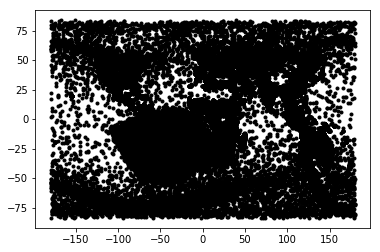

In [95]:
plt.plot(coords[:,1], coords[:,0], 'k.')
plt.show()

In [104]:
kms_per_radian = 6371.0088
epsilon = 1 / kms_per_radian
db = DBSCAN(eps=epsilon, min_samples=3, algorithm='ball_tree', metric='haversine').fit(np.radians(coords))

In [105]:
cluster_labels = db.labels_
len(set(cluster_labels))

4418

In [106]:
year_df['clusters'] = cluster_labels

In [107]:
sub_df = year_df[year_df['clusters'] != -1]

In [108]:
grouped_df = sub_df.groupby('clusters').agg({'frp': np.mean, 'lats': np.mean, 'lons': np.mean})

In [109]:
grouped_df.head()

,lons,frp,lats
clusters,,,
0,-109.635098,5.016985,30.492291
1,-110.863500,2.520450,33.411431
2,-68.105591,2.488102,-46.643992
3,-68.551687,0.953786,-45.875276
4,-68.856415,1.336712,-38.054080


In [110]:
sub_coords = grouped_df.as_matrix(columns=['lats', 'lons'])

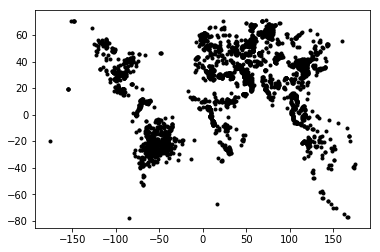

In [111]:
plt.plot(sub_coords[:,1], sub_coords[:,0], 'k.')
plt.show()